In [105]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from numpy import pi, mean

matplotlib.rcParams['figure.dpi'] = 200

In [60]:
fields_jld2 = "/home/alir/stratified_couette_Re4250_Ri0.040_Nz64_fields.jld2"
profs_jld2 = "/home/alir/stratified_couette_Re4250_Ri0.040_Nz64_profiles.jld2"
scalars_jld2 = "/home/alir/stratified_couette_Re4250_Ri0.040_Nz64_scalars.jld2"

In [120]:
fields = h5py.File(fields_jld2)
profs = h5py.File(profs_jld2)
scalars = h5py.File(scalars_jld2)

In [121]:
fIs = sorted(list(map(int, list(fields["timeseries/t"].keys()))))  # List of iterations with output.
pIs = sorted(list(map(int, list(profs["timeseries/t"].keys()))))  # List of iterations with output.
sIs = sorted(list(map(int, list(scalars["timeseries/t"].keys()))))  # List of iterations with output.

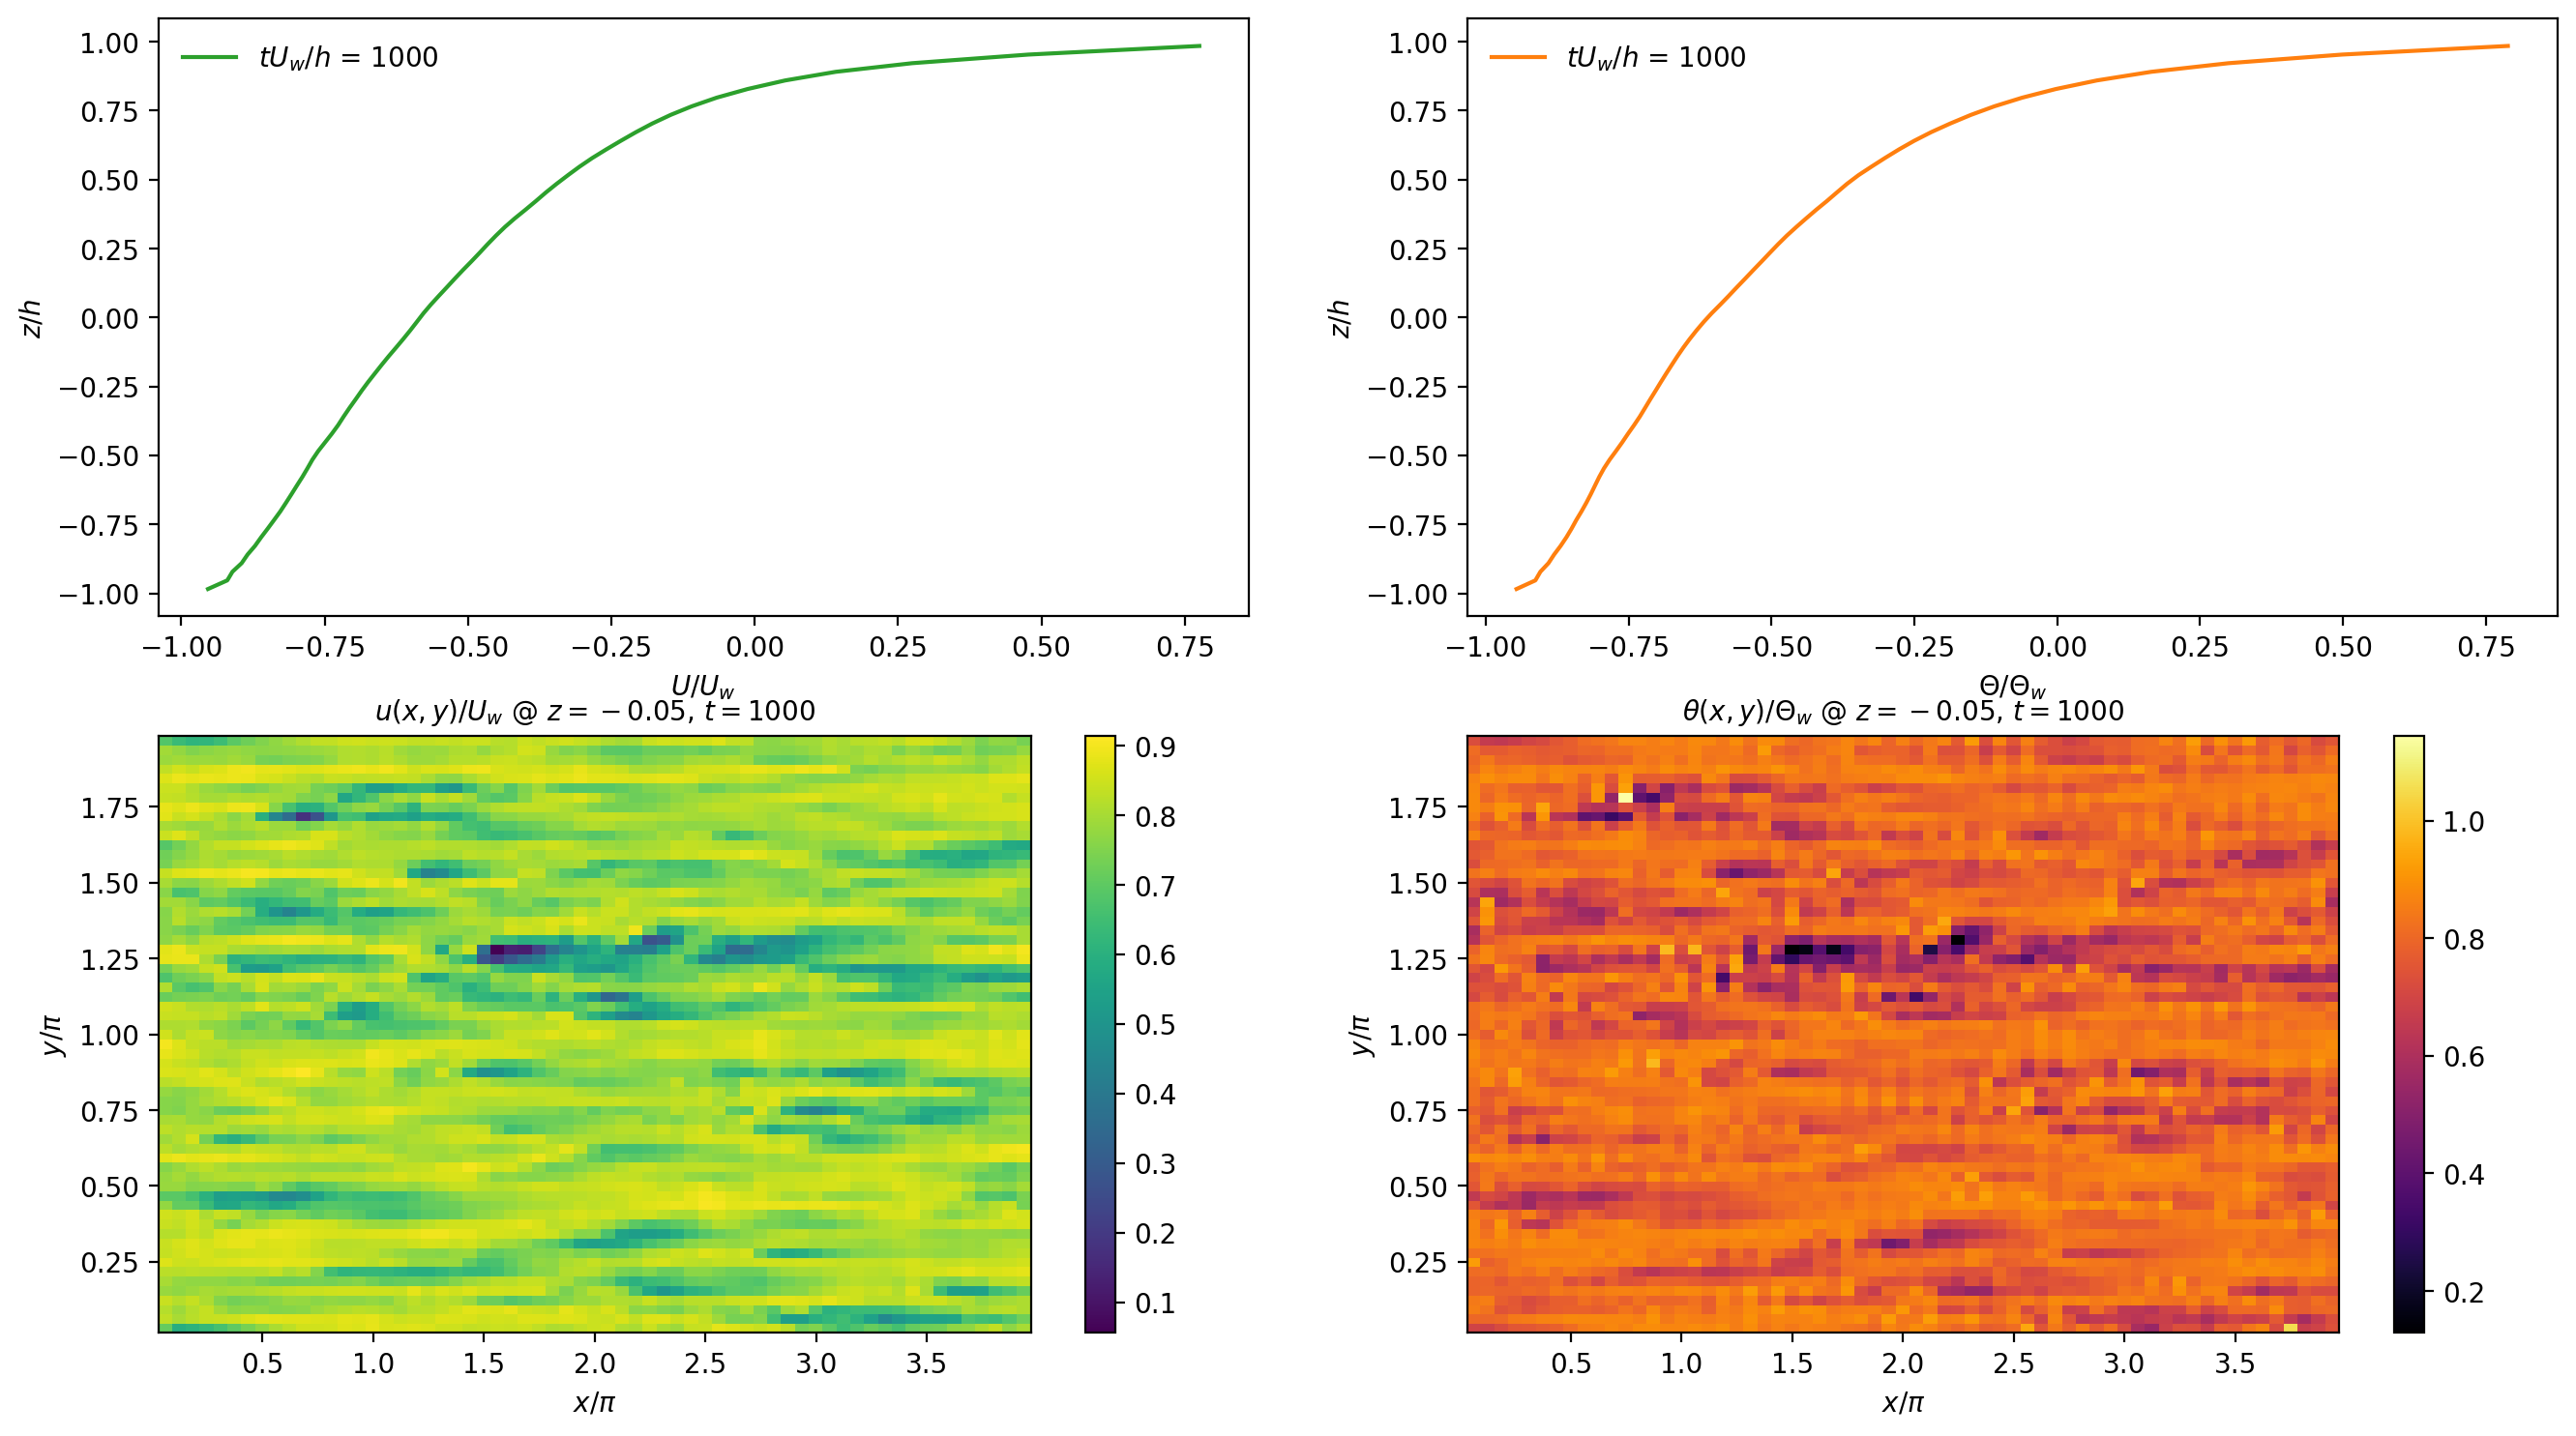

In [155]:
i = Is[-1]

t = profs["timeseries/t/" + str(i)][()]
x, y, z = profs["grid/xC"][()], profs["grid/yC"][()], profs["grid/zC"][()]

Uw = profs["parameters/wall_velocity"]
Tw = profs["parameters/wall_temperature"]

U = profs["timeseries/u/" + str(i)][()][1:-1, 0, 0]
T = profs["timeseries/T/" + str(i)][()][1:-1, 0, 0]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

ax1.plot(U/Uw, z+1, color="tab:green", label=r"$tU_w/h$ = {:.0f}".format(t))
ax1.set_xlabel(r"$U/U_w$")
ax1.set_ylabel(r"$z/h$")
ax1.legend(frameon=False)

ax2.plot(T/Tw, z+1, color="tab:orange", label=r"$tU_w/h$ = {:.0f}".format(t))
ax2.set_xlabel(r"$\Theta/\Theta_w$")
ax2.set_ylabel(r"$z/h$")
ax2.legend(frameon=False)

j = fIs[-1]
t = fields["timeseries/t/" + str(i)][()]
U_k = fields["timeseries/u/" + str(j)][()][1, 1:-1, 1:-1]
T_k = fields["timeseries/T/" + str(j)][()][1, 1:-1, 1:-1]

im3 = ax3.pcolormesh(x/pi, y/pi, U_k / Uw, cmap="viridis")
ax3.set_title(r"$u(x,y)/U_w$ @ $z={:.2f}$, $t={:.0f}$".format(z[1], t), fontsize=10)
ax3.set_xlabel(r"$x/\pi$")
ax3.set_ylabel(r"$y/\pi$")
fig.colorbar(im3, ax=ax3)

im4 = ax4.pcolormesh(x/pi, y/pi, T_k / Tw, cmap="inferno")
ax4.set_title(r"$\theta(x,y)/\Theta_w$ @ $z={:.2f}$, $t={:.0f}$".format(z[1], t), fontsize=10)
ax4.set_xlabel(r"$x/\pi$")
ax4.set_ylabel(r"$y/\pi$")
fig.colorbar(im4, ax=ax4)

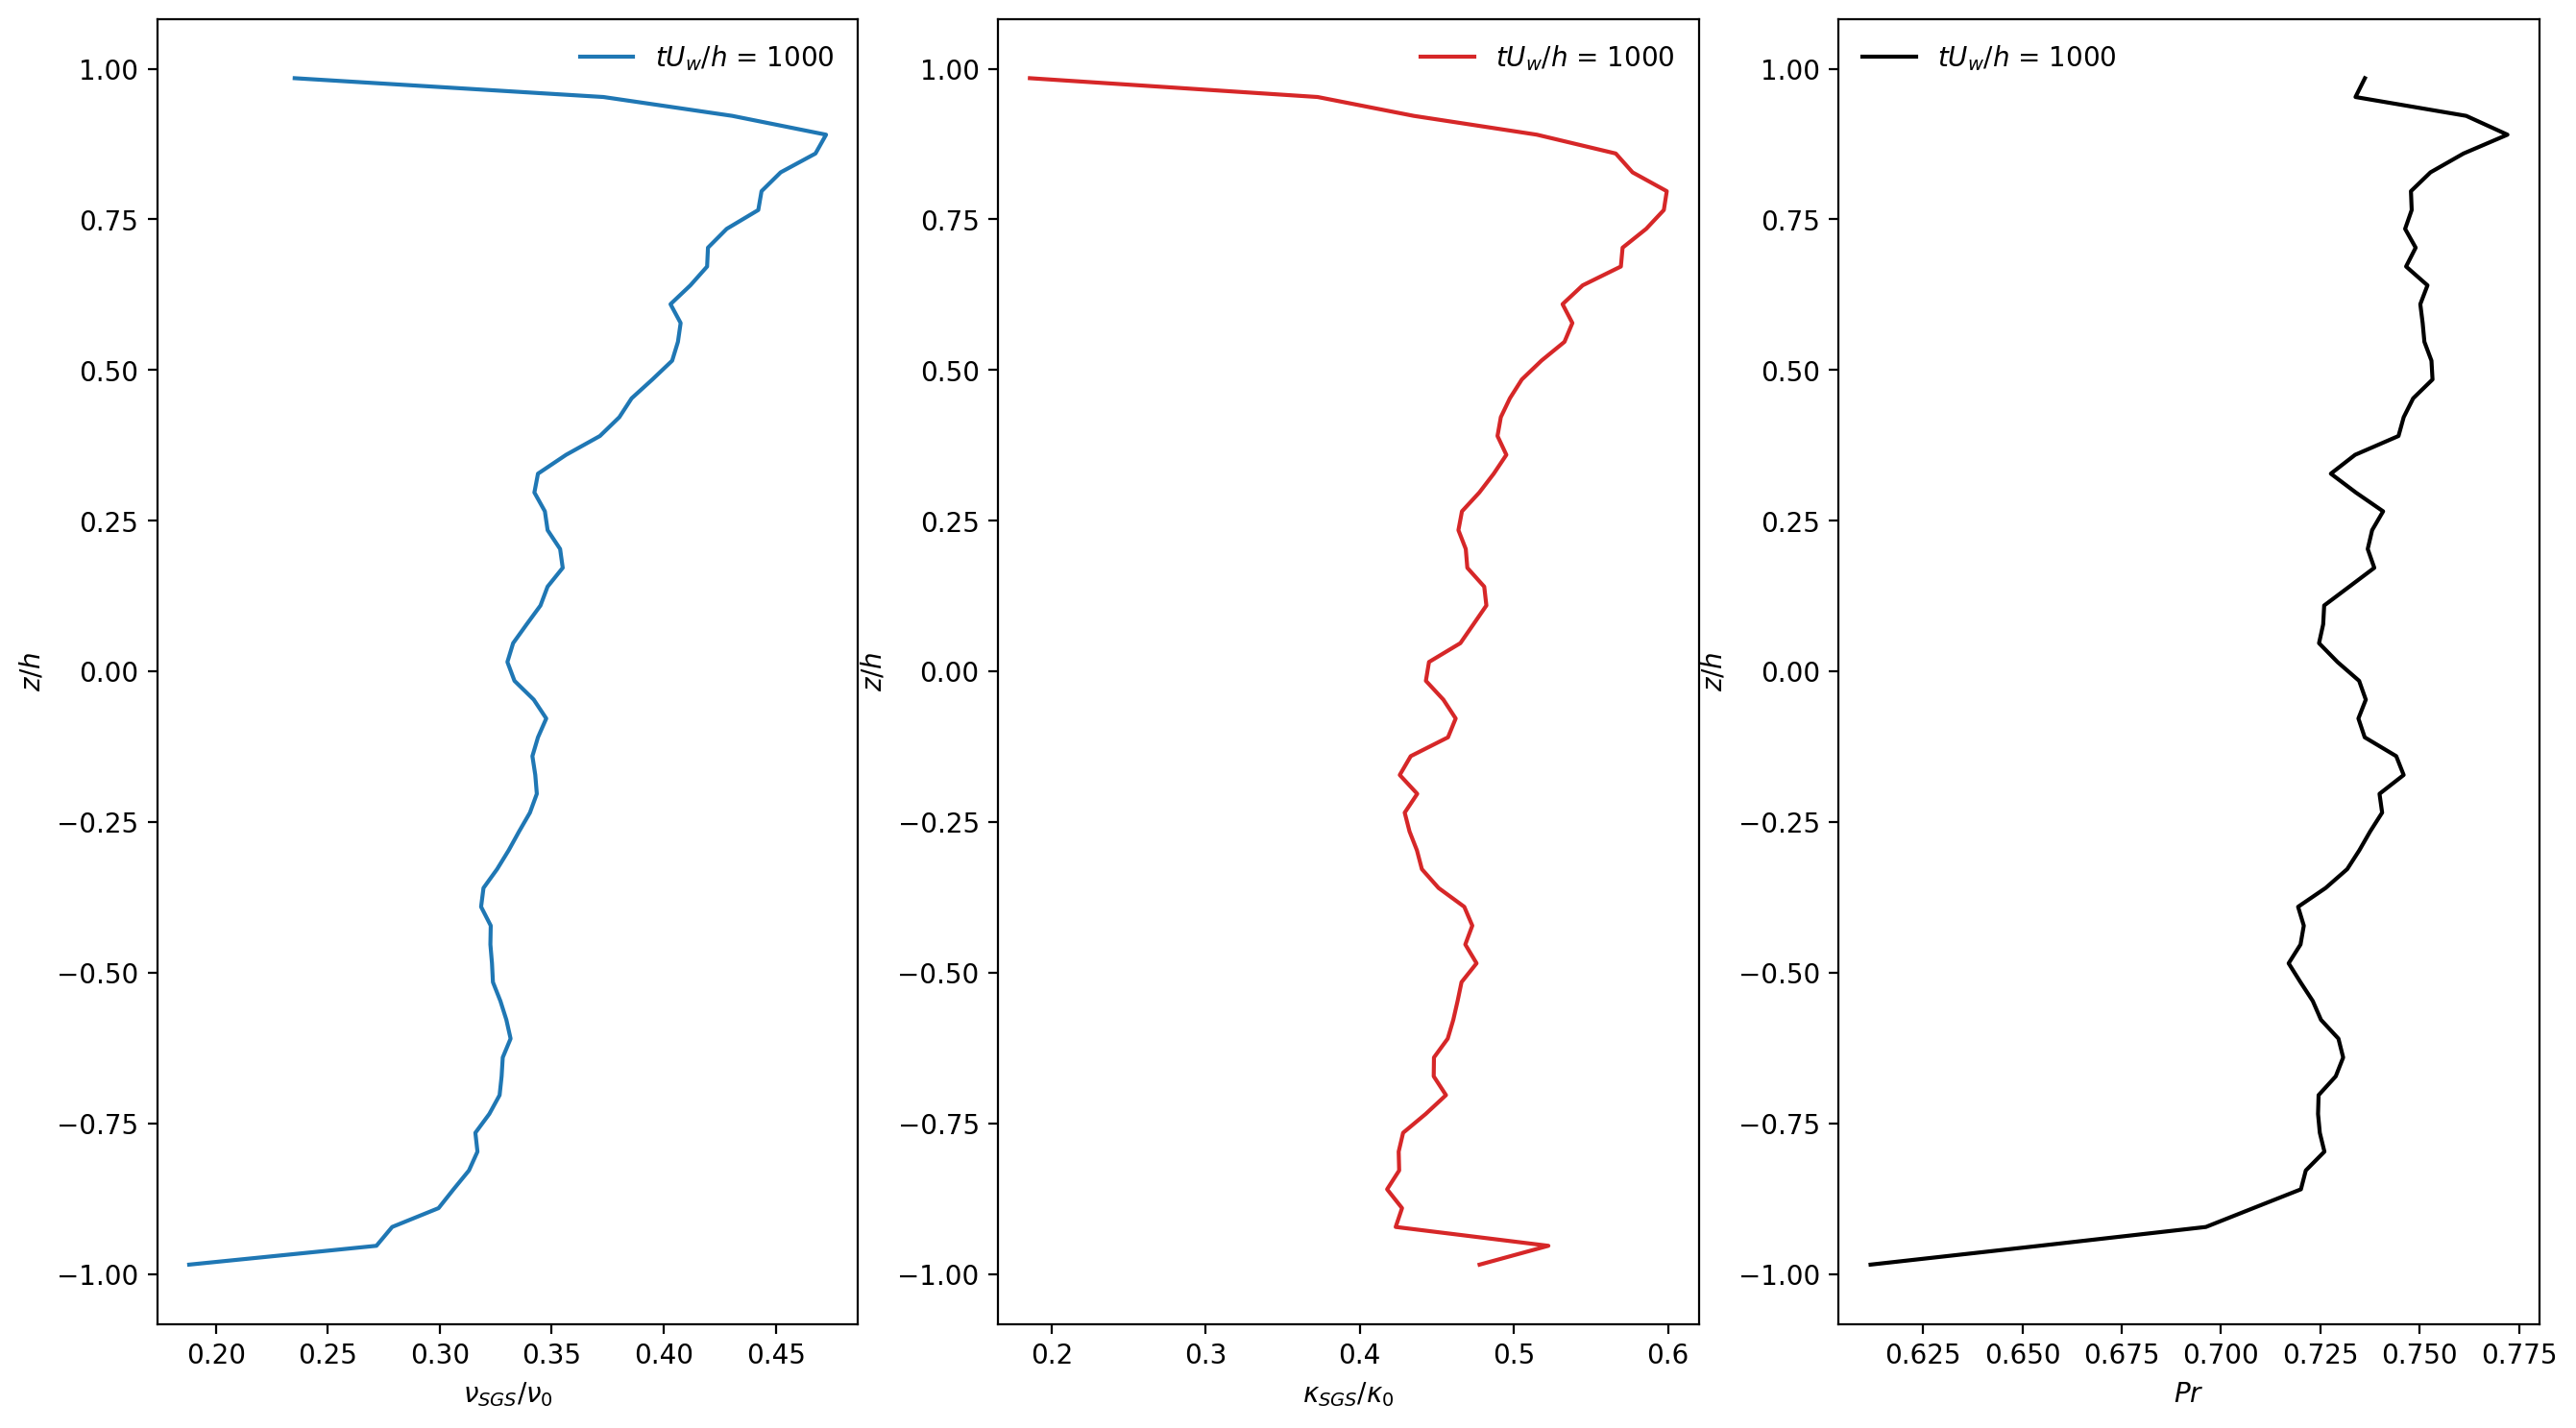

In [118]:
nu = fields["parameters/viscosity"][()]
kappa = fields["parameters/diffusivity"][()]

i = fIs[-1]
t = fields["timeseries/t/" + str(i)][()]

V = fields["timeseries/nu/" + str(i)][()][1:-1, 1:-1, 1:-1]
K = fields["timeseries/kappaT/" + str(i)][1:-1, 1:-1, 1:-1]
Pr = V / K

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))

ax1.plot(mean((V - nu) / nu, axis=(1,2)), z+1, color="tab:blue", label=r"$tU_w/h$ = {:.0f}".format(t))
ax1.set_xlabel(r"$\nu_{SGS}/\nu_0$")
ax1.set_ylabel(r"$z/h$")
ax1.legend(frameon=False)

ax2.plot(mean((K - kappa) / kappa, axis=(1,2)), z+1, color="tab:red", label=r"$tU_w/h$ = {:.0f}".format(t))
ax2.set_xlabel(r"$\kappa_{SGS}/\kappa_0$")
ax2.set_ylabel(r"$z/h$")
ax2.legend(frameon=False)

ax3.plot(mean(Pr, axis=(1,2)), z+1, color="black", label=r"$tU_w/h$ = {:.0f}".format(t))
ax3.set_xlabel(r"$Pr$")
ax3.set_ylabel(r"$z/h$")
ax3.legend(frameon=False)

In [152]:
scalars["parameters"].keys()

<KeysViewHDF5 ['diffusivity', 'prandtl_number', 'reynolds_number', 'richardson_number', 'viscosity', 'wall_temperature', 'wall_velocity']>

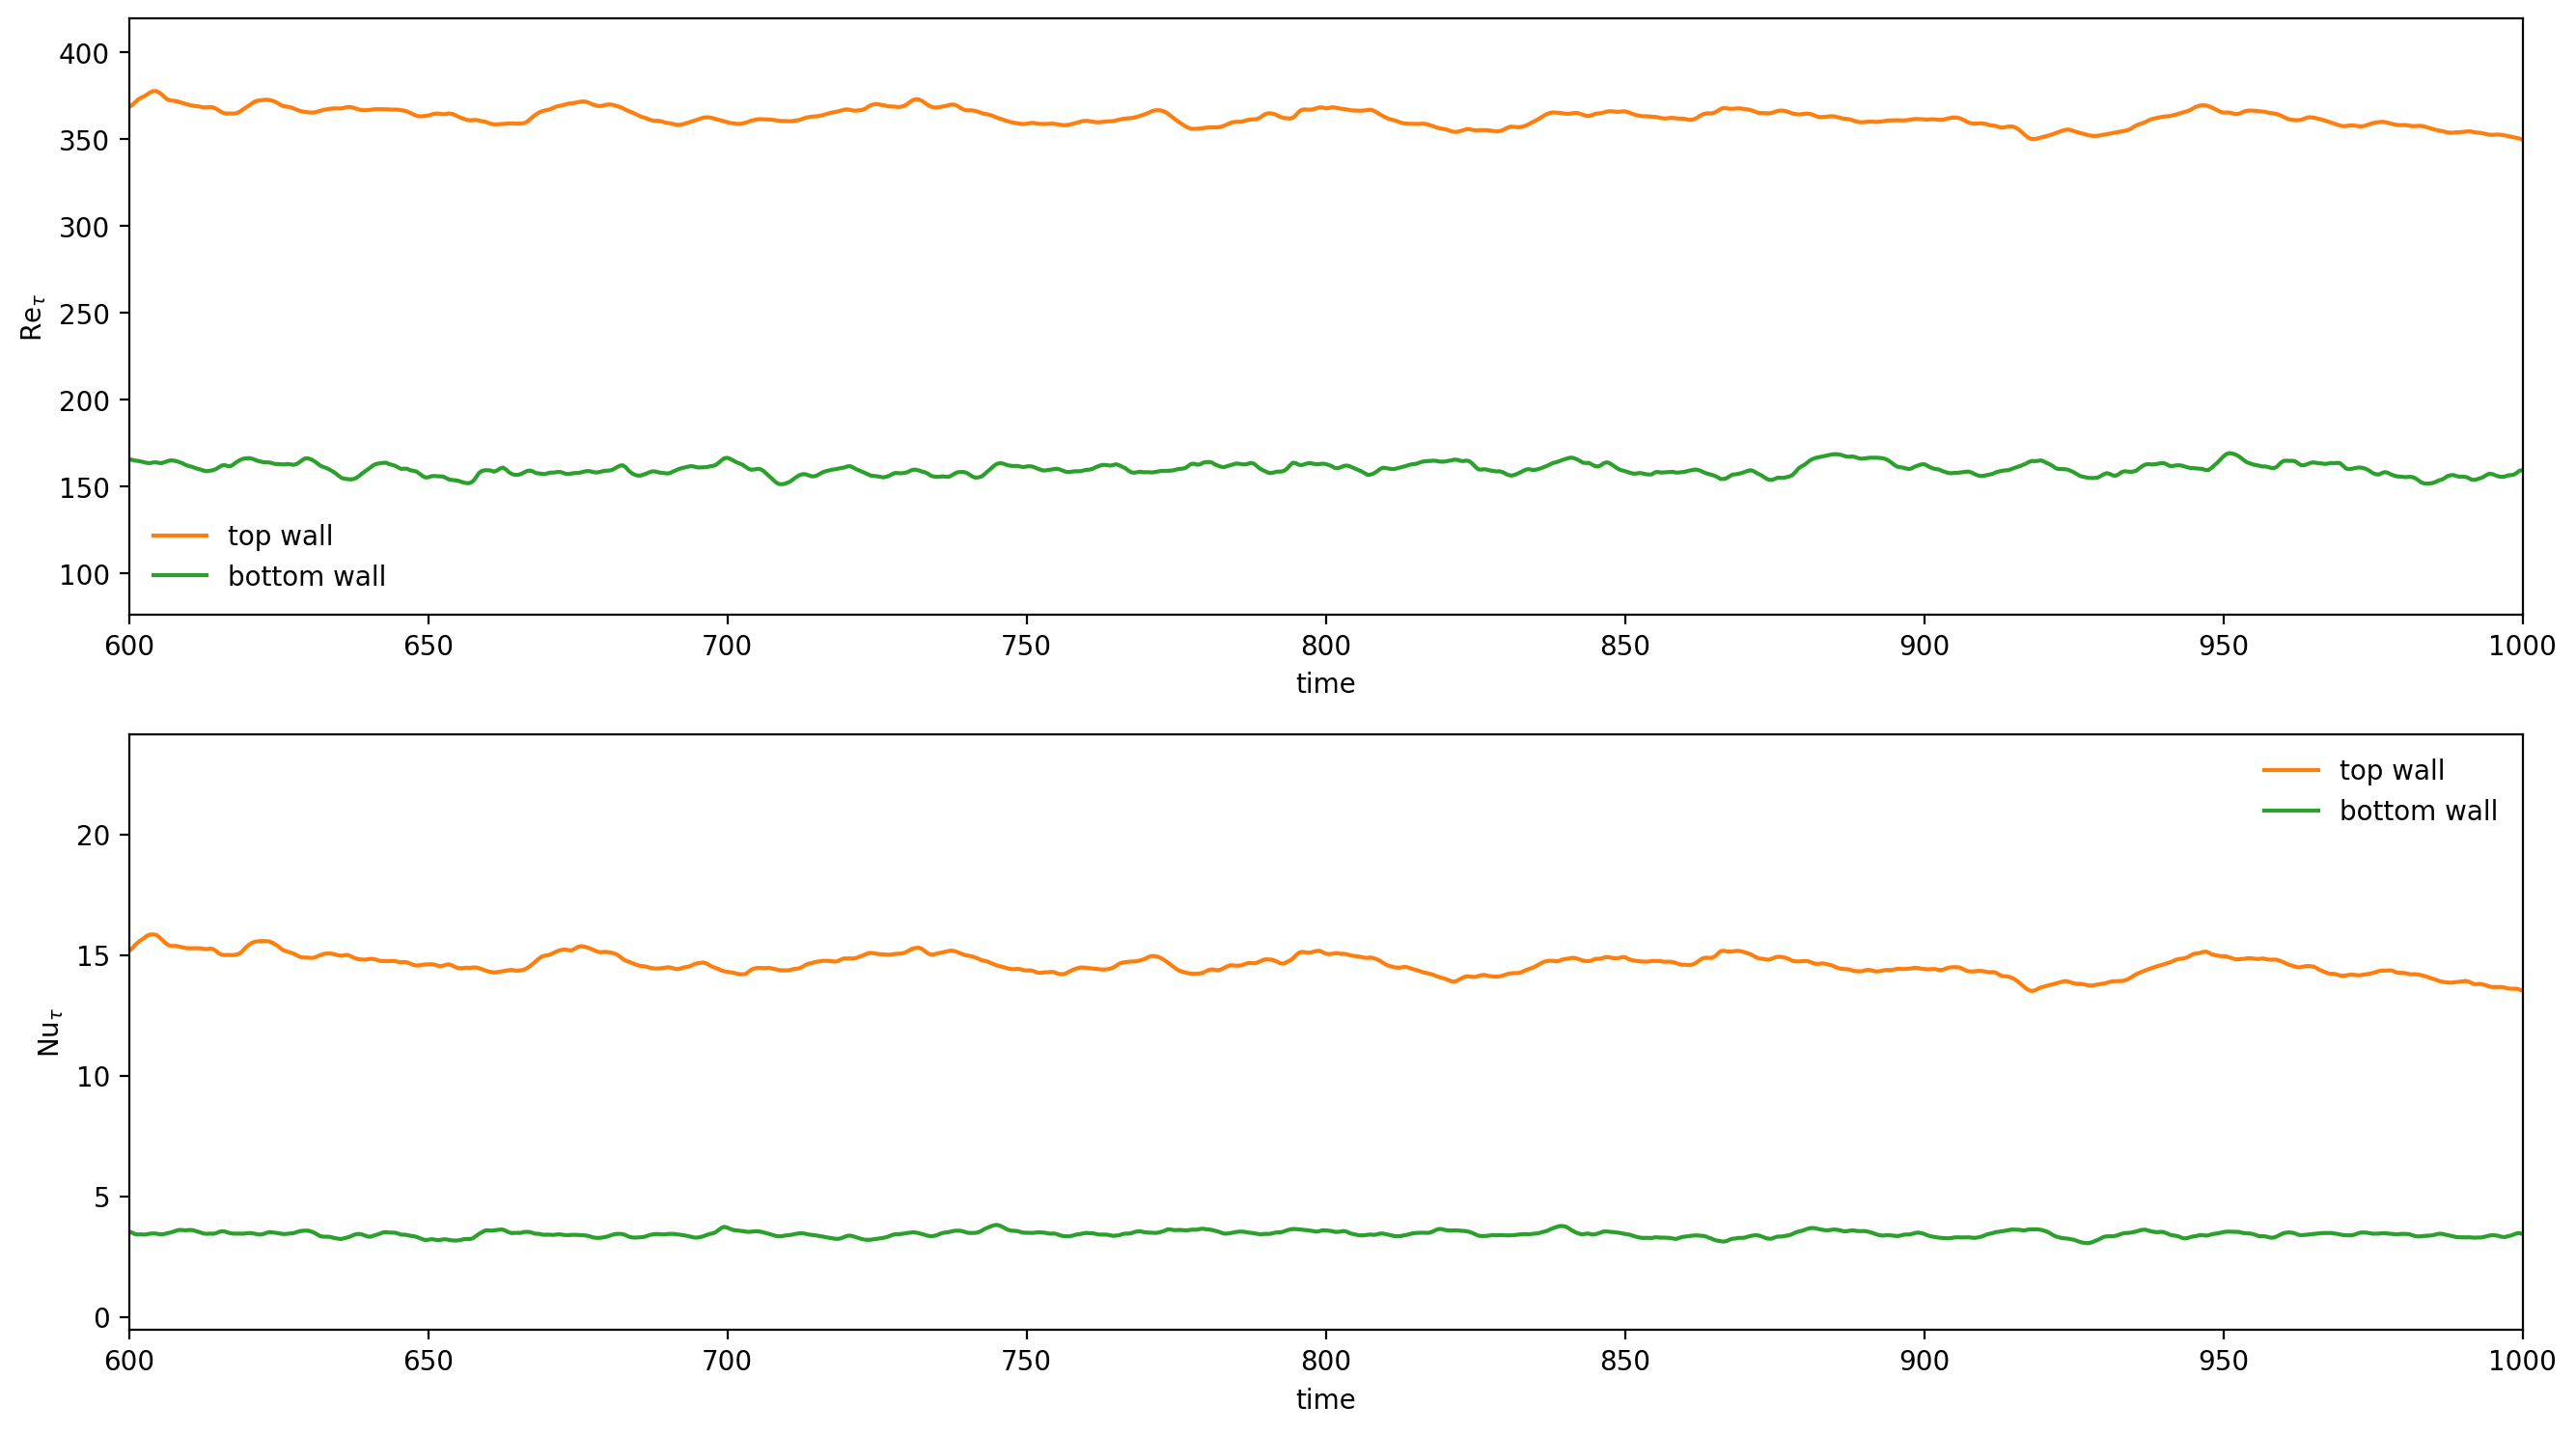

In [148]:
i = sIs[-1]

t = [scalars["timeseries/t/" + str(i)][()] for i in sIs]
Re1 = [scalars["timeseries/Re_tau/" + str(i)][()][0] for i in sIs]
Re2 = [scalars["timeseries/Re_tau/" + str(i)][()][1] for i in sIs]
Nu1 = [scalars["timeseries/Nu_tau/" + str(i)][()][0] for i in sIs]
Nu2 = [scalars["timeseries/Nu_tau/" + str(i)][()][1] for i in sIs]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 9))

ax1.plot(t, Re1, color="tab:orange", label="top wall")
ax1.plot(t, Re2, color="tab:green", label="bottom wall")
ax1.set_xlabel("time")
ax1.set_ylabel(r"Re$_\tau$")
ax1.set_xlim([600, 1000])
ax1.legend(frameon=False)

ax2.plot(t, Nu1, color="tab:orange", label="top wall")
ax2.plot(t, Nu2, color="tab:green", label="bottom wall")
ax2.set_xlabel("time")
ax2.set_ylabel(r"Nu$_\tau$")
ax2.set_xlim([600, 1000])
ax2.legend(frameon=False)